# Task 3: Customer Segmentation Analysis with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.drop(columns='CustomerID', axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
data.shape

(200, 4)

In [10]:
gender = {'Male':1, 'Female':0}
data['Gender'] = data['Gender'].map(gender)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
data.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [14]:
data.duplicated().sum()

0

c:\Python\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


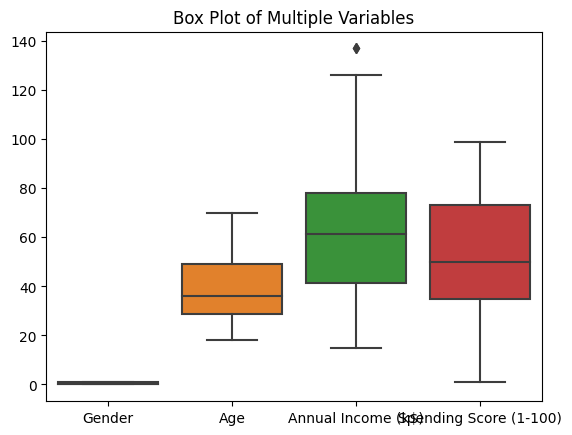

In [15]:
sns.boxplot(data= data)
plt.title("Box Plot of Multiple Variables")
plt.show()

c:\Python\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


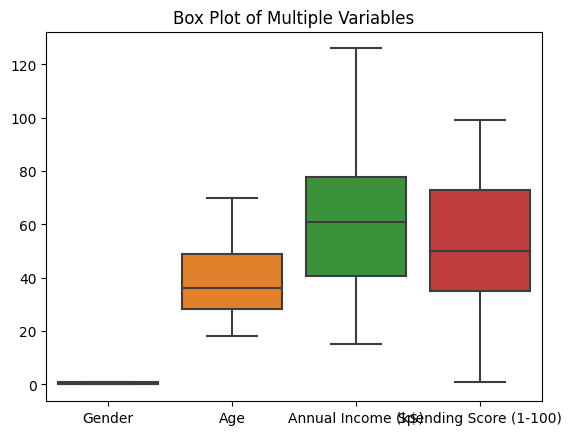

In [16]:
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
data_clustering_filtered = data[(data['Annual Income (k$)'] >= lower_bound) & (data['Annual Income (k$)'] <= upper_bound)]

sns.boxplot(data=data_clustering_filtered)
plt.title("Box Plot of Multiple Variables")
plt.show()

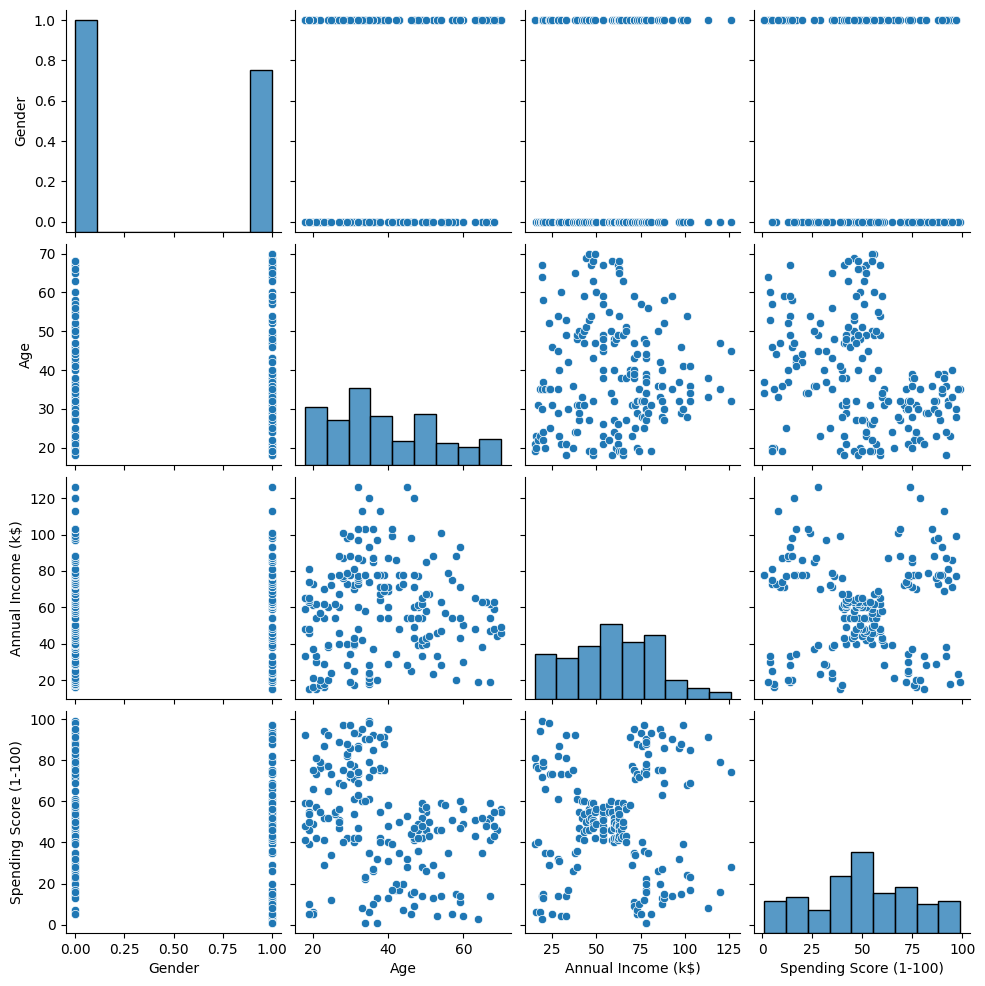

In [17]:
sns.pairplot(data_clustering_filtered)

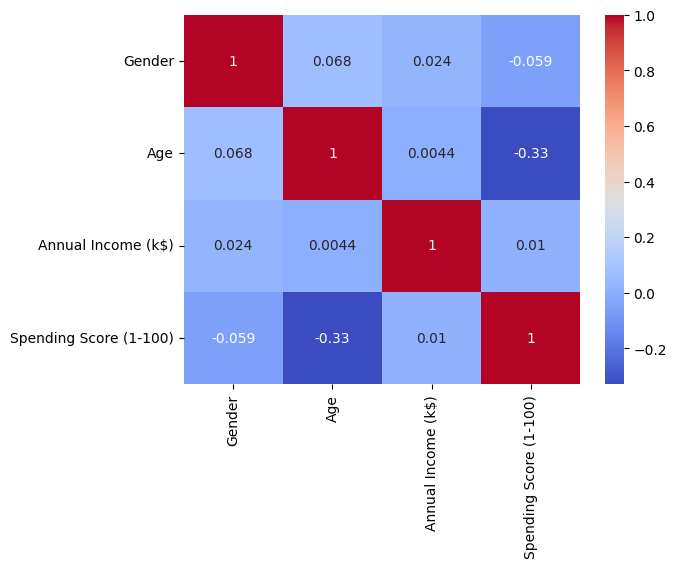

In [18]:
sns.heatmap(data_clustering_filtered.corr(), annot=True, cmap='coolwarm')
plt.show()

In [20]:
import plotly.express as px

fig = px.scatter_3d(data_clustering_filtered, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Gender')
fig.show()

## K Means Clustering

In [21]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(data_clustering_filtered)

labels1 = kmeans1.labels_
centers1 = kmeans1.cluster_centers_

print("Cluster Labels:", labels1)
print("Cluster Centers:", centers1)

Cluster Labels: [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0]
Cluster Centers: [[ 0.44047619 28.94047619 61.28571429 73.51190476]
 [ 0.42982456 46.28947368 58.68421053 33.01754386]]


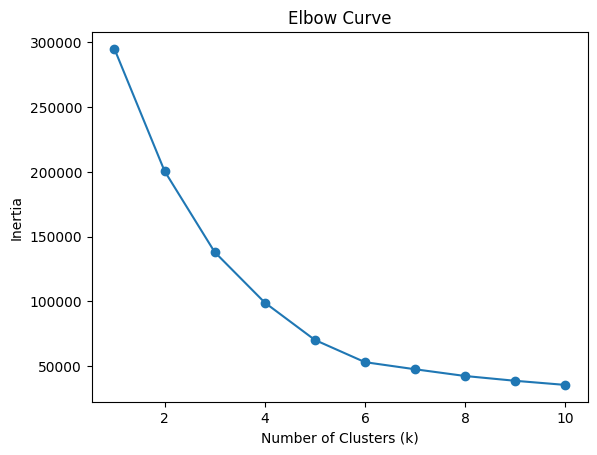

In [22]:
inertia = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    kmeans.fit(data_clustering_filtered)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [23]:
cluster_range = range(4, 9)
from sklearn.metrics import silhouette_score
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters)
    kmeans.fit(data_clustering_filtered)
    
    labels = kmeans.labels_
    score = silhouette_score(data_clustering_filtered, labels)
        
    print("Clusters =", n_clusters, "  Silhouette Score =", score)

Clusters = 4   Silhouette Score = 0.40758212907644736
Clusters = 5   Silhouette Score = 0.4491488616872189
Clusters = 6   Silhouette Score = 0.459547253140841
Clusters = 7   Silhouette Score = 0.4409099531650993
Clusters = 8   Silhouette Score = 0.38959235629321887


In [24]:
kmeans = KMeans(n_clusters=5)

labels = kmeans.fit_predict(data_clustering_filtered)
centers = kmeans.cluster_centers_

print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

Cluster Labels: [2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 1 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3]
Cluster Centers: [[ 0.39130435 25.52173913 26.30434783 78.56521739]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.44736842 32.76315789 85.21052632 82.10526316]
 [ 0.51428571 40.91428571 86.34285714 17.57142857]]


C:\Users\Priya\AppData\Local\Temp\ipykernel_3396\946725647.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



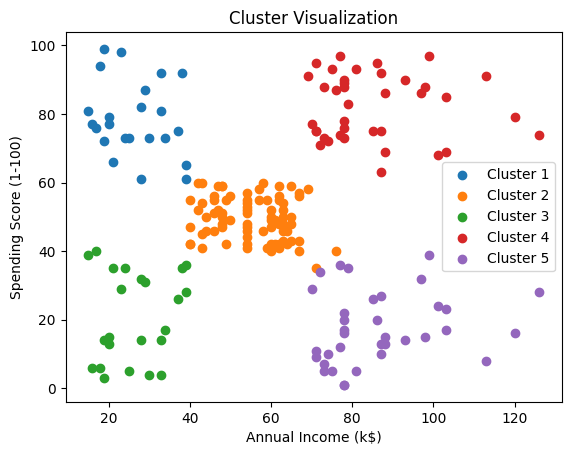

In [25]:
data_clustering_filtered['Cluster'] = labels

for cluster_label in range(5):
    cluster_data = data_clustering_filtered[data_clustering_filtered['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_label + 1}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Visualization')
plt.legend()
plt.show()